In [2]:
import pandas as pd
import requests
from datetime import datetime, timedelta
import time
import os
from utils import getSchema

from matplotlib import pyplot as plt

parent = os.path.dirname(os.path.abspath('__file__'))
output_path = os.path.join(parent, 'OptionOI')
if not os.path.isdir(output_path):
    os.makedirs(output_path)

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [3]:
def getIndexInterDay(ticker='發行量加權股價指數', start_date:datetime=datetime.today(), end_date:datetime=datetime.today()):
    schema = getSchema("TWSE")
    table = schema['HistoricalPrice.Index.Interday']
    data = list(table.find({'Date':{"$gte":start_date.strftime("%Y-%m-%d"),
                                   "$lte":end_date.strftime("%Y-%m-%d")},
                           "IndexName":{"$in":ticker.split(',')}}))
    df = pd.DataFrame(data)
    del df['_id']
    return df

In [4]:
def getOptionOI(date:datetime=datetime.today()):
    df = pd.DataFrame()
    dtStr = date.strftime("%Y%m%d")
    isnet = False
    if date.isocalendar()[-1] <= 5:
        file_path = os.path.join(output_path, f'{dtStr}_OI.csv')
        if os.path.isfile(file_path):
            df = pd.read_csv(file_path)
            for col in df.columns:
                df[col] = df[col].apply(lambda x: str(x).strip())
        else:
            isnet = True
            url = f'https://www.taifex.com.tw/file/taifex/Dailydownload/LI/chinese/OPT/LI_{dtStr}.csv'
            try:
                df = pd.read_csv(url, encoding='cp950', skiprows=1)
            except:
                pass
            if not df.empty:
                if df.shape[1] == 1:
                    return pd.DataFrame(), isnet
                df.columns = 'Contract,C/P,TTM,Strike,OI,Volume,Liquitity'.split(',')
                for col in df.columns:
                    df[col] = df[col].apply(lambda x: str(x).strip())
                df.to_csv(file_path, index=False, encoding='utf-8')
    return df, isnet

In [5]:
Option_oi = {}

In [6]:
for date in pd.date_range(datetime(2021,3,1), datetime(2022,6,30)):
    print(f"========= Read {date.strftime('%Y-%m-%d')} =========")
    Option_oi[date], isnet = getOptionOI(date)
    if isnet:
        time.sleep(3)

========= Read 2021-03-01 =========
========= Read 2021-03-02 =========
========= Read 2021-03-03 =========
========= Read 2021-03-04 =========
========= Read 2021-03-05 =========
========= Read 2021-03-06 =========
========= Read 2021-03-07 =========
========= Read 2021-03-08 =========
========= Read 2021-03-09 =========
========= Read 2021-03-10 =========
========= Read 2021-03-11 =========
========= Read 2021-03-12 =========
========= Read 2021-03-13 =========
========= Read 2021-03-14 =========
========= Read 2021-03-15 =========
========= Read 2021-03-16 =========
========= Read 2021-03-17 =========
========= Read 2021-03-18 =========
========= Read 2021-03-19 =========
========= Read 2021-03-20 =========
========= Read 2021-03-21 =========
========= Read 2021-03-22 =========
========= Read 2021-03-23 =========
========= Read 2021-03-24 =========
========= Read 2021-03-25 =========
========= Read 2021-03-26 =========
========= Read 2021-03-27 =========
========= Read 2021-03-28 ==

========= Read 2021-10-16 =========
========= Read 2021-10-17 =========
========= Read 2021-10-18 =========
========= Read 2021-10-19 =========
========= Read 2021-10-20 =========
========= Read 2021-10-21 =========
========= Read 2021-10-22 =========
========= Read 2021-10-23 =========
========= Read 2021-10-24 =========
========= Read 2021-10-25 =========
========= Read 2021-10-26 =========
========= Read 2021-10-27 =========
========= Read 2021-10-28 =========
========= Read 2021-10-29 =========
========= Read 2021-10-30 =========
========= Read 2021-10-31 =========
========= Read 2021-11-01 =========
========= Read 2021-11-02 =========
========= Read 2021-11-03 =========
========= Read 2021-11-04 =========
========= Read 2021-11-05 =========
========= Read 2021-11-06 =========
========= Read 2021-11-07 =========
========= Read 2021-11-08 =========
========= Read 2021-11-09 =========
========= Read 2021-11-10 =========
========= Read 2021-11-11 =========
========= Read 2021-11-12 ==

========= Read 2022-06-01 =========
========= Read 2022-06-02 =========
========= Read 2022-06-03 =========
========= Read 2022-06-04 =========
========= Read 2022-06-05 =========
========= Read 2022-06-06 =========
========= Read 2022-06-07 =========
========= Read 2022-06-08 =========
========= Read 2022-06-09 =========
========= Read 2022-06-10 =========
========= Read 2022-06-11 =========
========= Read 2022-06-12 =========
========= Read 2022-06-13 =========
========= Read 2022-06-14 =========
========= Read 2022-06-15 =========
========= Read 2022-06-16 =========
========= Read 2022-06-17 =========
========= Read 2022-06-18 =========
========= Read 2022-06-19 =========
========= Read 2022-06-20 =========
========= Read 2022-06-21 =========
========= Read 2022-06-22 =========
========= Read 2022-06-23 =========
========= Read 2022-06-24 =========
========= Read 2022-06-25 =========
========= Read 2022-06-26 =========
========= Read 2022-06-27 =========
========= Read 2022-06-28 ==

In [7]:
def AggregateOI(date, df):
    df = df.copy(deep=True)
    df = df[df.Contract.apply(lambda x: x.strip()) == 'TXO']
    
    # Check TTM    
#     print(df.TTM.unique())
    TTMs = sorted(df.TTM.astype(str).unique(), key=lambda x: str(x)[:6])
#     print(TTMs)
    closed_ttm = str(TTMs[0]).strip()
    ttm_year = int(closed_ttm[:4])
    ttm_month = int(closed_ttm[4:6])
    
    start_date = datetime(ttm_year, ttm_month, 1)
    next_month_date = start_date + timedelta(31)
    end_date = next_month_date.replace(day=1) + timedelta(-1)
#     print(start_date, end_date)
    ttm_dates = pd.date_range(start_date, end_date, freq="W-WED")
#     print(closed_ttm)
#     print(ttm_dates)
    if "W" in closed_ttm:
        ttm_date = ttm_dates[1]
#         ttm_date = ttm_dates[int(closed_ttm[-1])-1]
    else:
        ttm_date = ttm_dates[2]
#     print(date.date(), ttm_date.date(), date.date() in [x.date() for x in ttm_dates], '\n')
    if date.date() == ttm_dates[0].date():#[x.date() for x in ]:
        closed_ttm = TTMs[1]
    if "W" in closed_ttm:
        closed_ttm = TTMs[1]
    tmp_df = df[df.TTM.astype(str) == closed_ttm]
    call_df = tmp_df[tmp_df['C/P']=='買權']
    call_df.OI = call_df.OI.apply(lambda x: float(x))
    call_df = call_df.sort_values("OI", ascending=False).head(10)
    put_df = tmp_df[tmp_df['C/P']=='賣權']
    put_df.OI = put_df.OI.apply(lambda x: float(x))
    put_df = put_df.sort_values("OI", ascending=False).head(10)
#     print(call_df)
#     print(put_df)
    output = {
        'Date':date,
        "TTM":closed_ttm,
        'MaxOIStrikeCall':call_df.loc[call_df.index[0], 'Strike'],
        'MaxOICall':float(call_df.loc[call_df.index[0], 'OI']),
        'TotalOICall':call_df.OI.apply(lambda x: float(x)).sum(),
        'VWStrikeCall':(call_df.OI.apply(lambda x: float(x)) * call_df.Strike.apply(lambda x: float(x))).sum() / call_df.OI.apply(lambda x: float(x)).sum(),
        'MaxOIStrikePut':put_df.loc[put_df.index[0], 'Strike'],
        'MaxOIPut':float(put_df.loc[put_df.index[0], 'OI']),
        'TotalOIPut':put_df.OI.apply(lambda x: float(x)).sum(),
        'VWStrikePut':(put_df.OI.apply(lambda x: float(x)) * put_df.Strike.apply(lambda x: float(x))).sum() / put_df.OI.apply(lambda x: float(x)).sum(),
        "IsTTM":int(date.date() == ttm_date.date()),
    }
#     print(output['TotalOICall'], output['TotalOIPut'], '\n')
    return output
    
    
    

In [8]:
aggregate_data = []

for date, df in Option_oi.items():
    if df.empty:
        continue
    aggregate_data.append(AggregateOI(date, df))
#     break

In [10]:
OI_df = pd.DataFrame(aggregate_data).set_index('Date')
OI_df['OICallDiff'] = OI_df['TotalOICall'].astype(float).diff()
OI_df['OIPutDiff'] = OI_df['TotalOIPut'].astype(float).diff()
OI_df['OI_Ratio'] = round(OI_df['TotalOICall'].astype(float) / OI_df['TotalOIPut'].astype(float) - 1, 2)
OI_df['OI_Ratio_diff'] = OI_df['OI_Ratio'].diff()

In [11]:
OI_df

,TTM,MaxOIStrikeCall,MaxOICall,TotalOICall,VWStrikeCall,MaxOIStrikePut,MaxOIPut,TotalOIPut,VWStrikePut,IsTTM,OICallDiff,OIPutDiff,OI_Ratio,OI_Ratio_diff
Date,,,,,,,,,,,,,,
2021-03-18,202104,17000.0,13378.0,66796.0,16845.451823,15000.0,11200.0,73272.0,15477.350147,0,NaN,NaN,-0.09,NaN
2021-03-19,202104,17000.0,13288.0,78528.0,16999.144254,15000.0,12310.0,79108.0,15357.440461,0,11732.0,5836.0,-0.01,0.08
2021-03-22,202104,17000.0,14478.0,86206.0,16975.233742,15000.0,13092.0,86968.0,15422.663508,0,7678.0,7860.0,-0.01,0.00
2021-03-23,202104,17000.0,15300.0,90638.0,16898.117787,15000.0,13644.0,90372.0,15501.431859,0,4432.0,3404.0,0.00,0.01
2021-03-24,202104,17000.0,15350.0,98932.0,16807.777059,15000.0,22740.0,103398.0,15436.847908,0,8294.0,13026.0,-0.04,-0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24,202207,16000.0,17242.0,122848.0,16453.768885,15000.0,12840.0,81526.0,14358.256262,0,332.0,3684.0,0.51,-0.06
2022-06-27,202207,17000.0,17026.0,124414.0,16401.387304,15000.0,14004.0,87792.0,14470.434664,0,1566.0,6266.0,0.42,-0.09
2022-06-28,202207,16000.0,18106.0,132730.0,16079.835757,14500.0,13982.0,92208.0,14463.168055,0,8316.0,4416.0,0.44,0.02


In [12]:
dates=sorted(Option_oi.keys())
idx_df = getIndexInterDay(start_date=dates[0])

In [13]:
idx_df

,Date,IndexName,Open,High,Low,Close
0,2021-03-02,發行量加權股價指數,15953.80,16262.91,15946.88,15946.88
1,2021-03-03,發行量加權股價指數,15946.88,16211.73,15884.55,16211.73
2,2021-03-04,發行量加權股價指數,16211.73,16211.73,15840.99,15906.41
3,2021-03-05,發行量加權股價指數,15906.41,15934.43,15636.43,15855.23
4,2021-03-08,發行量加權股價指數,15855.23,16074.97,15816.50,15820.11
...,...,...,...,...,...,...
324,2022-06-27,發行量加權股價指數,15303.32,15656.35,15303.32,15548.01
325,2022-06-28,發行量加權股價指數,15548.01,15548.01,15375.65,15439.92
326,2022-06-29,發行量加權股價指數,15439.92,15439.92,15218.07,15240.13
327,2022-06-30,發行量加權股價指數,15240.13,15240.13,14825.73,14825.73


In [14]:
idx_df = idx_df.set_index("Date")
idx_df.index = pd.to_datetime(idx_df.index)

In [15]:
for i in range(OI_df.shape[0]):
    if i < 2:
        continue
    if OI_df.loc[OI_df.index[i-1], 'TTM'] != OI_df.loc[OI_df.index[i], 'TTM']:
        continue
#     print(OI_df.index[i-1])
    if OI_df.loc[OI_df.index[i-1], 'OICallDiff'] > 0 and OI_df.loc[OI_df.index[i-1], 'OIPutDiff'] > 0:
        if OI_df.loc[OI_df.index[i-1], 'OICallDiff'] > OI_df.loc[OI_df.index[i-1], 'OIPutDiff']:
            idx_df.loc[OI_df.index[i], "Prediction"] = "C > O"
        elif OI_df.loc[OI_df.index[i-1], 'OICallDiff'] < OI_df.loc[OI_df.index[i-1], 'OIPutDiff']:
            idx_df.loc[OI_df.index[i], "Prediction"] = "C < O"
        if float(idx_df.loc[OI_df.index[i], "Close"]) > float(idx_df.loc[OI_df.index[i], "Open"]):
                idx_df.loc[OI_df.index[i], "Realized"] = "C > O"
        if float(idx_df.loc[OI_df.index[i], "Close"]) < float(idx_df.loc[OI_df.index[i], "Open"]):
            idx_df.loc[OI_df.index[i], "Realized"] = "C < O"
        if idx_df.loc[OI_df.index[i], "Prediction"] == "C > O":
            if float(idx_df.loc[OI_df.index[i], "High"]) > float(idx_df.loc[OI_df.index[i], "Open"]) + 50:
                idx_df.loc[OI_df.index[i], "Profitable"] = "Earned"
        if idx_df.loc[OI_df.index[i], "Prediction"] == "C < O":
            if float(idx_df.loc[OI_df.index[i], "Low"]) < float(idx_df.loc[OI_df.index[i], "Open"]) - 50:
                idx_df.loc[OI_df.index[i], "Profitable"] = "Earned"
#         if float(idx_df.loc[OI_df.index[i], "Close"]) > float(idx_df.loc[OI_df.index[i-1], "Close"]):
#                 idx_df.loc[OI_df.index[i], "RealizedON"] = "C > O"
#         if float(idx_df.loc[OI_df.index[i], "Close"]) < float(idx_df.loc[OI_df.index[i-1], "Close"]):
#             idx_df.loc[OI_df.index[i], "RealizedON"] = "C < O"

In [16]:
com = pd.concat([idx_df,OI_df], axis=1)
com['Match'] = com['Prediction'] == com['Realized']
tmp_com = com[com["Prediction"].isnull()]
com.loc[tmp_com.index,"Match"] = float('nan')
com['MoneylessCall'] = round(com.Close / com['MaxOIStrikeCall'].astype(float) - 1, 2)
com['MoneylessPut'] = round(com.Close / com['MaxOIStrikePut'].astype(float) - 1, 2)

In [17]:
com.to_csv(os.path.join(output_path, 'Summary_Month.csv'), encoding='utf-8-sig')

In [37]:
com

,IndexName,Open,High,Low,Close,Prediction,Realized,Profitable,TTM,MaxOIStrikeCall,...,MaxOIPut,TotalOIPut,IsTTM,OICallDiff,OIPutDiff,OI_Ratio,OI_Ratio_diff,Match,MoneylessCall,MoneylessPut
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-01,發行量加權股價指數,17427.76,17626.21,17374.59,17585.99,NaN,NaN,NaN,202112,18000.0,...,29384.0,141258.0,0.0,NaN,NaN,0.12,NaN,NaN,-0.02,0.05
2021-12-02,發行量加權股價指數,17585.99,17741.55,17559.44,17724.88,NaN,NaN,NaN,202112,18000.0,...,29308.0,145678.0,0.0,-1966.0,4420.0,0.07,-0.05,NaN,-0.02,0.06
2021-12-03,發行量加權股價指數,17724.88,17781.14,17670.32,17697.14,NaN,NaN,NaN,202112,18000.0,...,28852.0,148762.0,0.0,-2590.0,3084.0,0.03,-0.04,NaN,-0.02,0.06
2021-12-06,發行量加權股價指數,17697.14,17763.42,17585.95,17688.21,NaN,NaN,NaN,202112,18000.0,...,29656.0,155912.0,0.0,11466.0,7150.0,0.05,0.02,NaN,-0.02,0.06
2021-12-07,發行量加權股價指數,17688.21,17796.92,17642.32,17796.92,C > O,C > O,Earned,202112,18000.0,...,29420.0,155562.0,0.0,3490.0,-350.0,0.08,0.03,1.0,-0.01,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-27,發行量加權股價指數,15303.32,15656.35,15303.32,15548.01,C < O,C > O,NaN,202207,17000.0,...,14004.0,87792.0,0.0,1566.0,6266.0,0.42,-0.09,0.0,-0.09,0.04
2022-06-28,發行量加權股價指數,15548.01,15548.01,15375.65,15439.92,C < O,C < O,Earned,202207,16000.0,...,13982.0,92208.0,0.0,8316.0,4416.0,0.44,0.02,1.0,-0.04,0.06
2022-06-29,發行量加權股價指數,15439.92,15439.92,15218.07,15240.13,C > O,C < O,NaN,202207,16000.0,...,14124.0,94172.0,0.0,2638.0,1964.0,0.44,0.00,0.0,-0.05,0.02


In [18]:
plt_df = com.tail(150)

In [19]:
expire_dates = []
for i, row in enumerate(plt_df.itertuples()):
    if not i: continue
    if not np.isnan(float(row.TTM)):
        if row.TTM != plt_df.loc[plt_df.index[i-1], "TTM"]:
            expire_dates.append(row.Index)

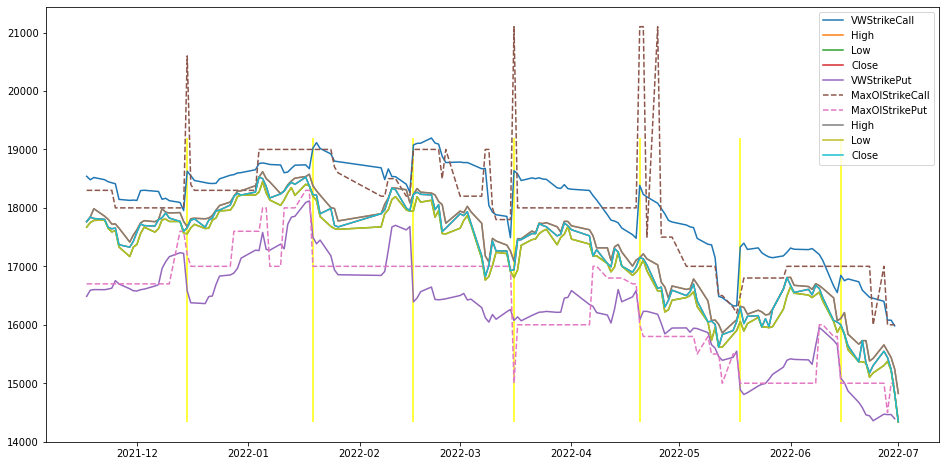

In [44]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
for col in 'VWStrikeCall,High,Low,Close,VWStrikePut'.split(','):
    ax.plot(plt_df.index, plt_df[col], label=col)
# com['VWStrikeCall,High,Low,Close,VWStrikePut'.split(',')].plot(ax=ax)
for col in 'MaxOIStrikeCall,MaxOIStrikePut'.split(','):
    ax.plot(plt_df.index, plt_df[col].astype(float), linestyle='--', label=col)
for col in 'High,Low,Close'.split(','):
    ax.plot(plt_df.index, plt_df[col], label=col)
# ax2 = ax.twinx()
# high_spread = plt_df['MaxOIStrikeCall'].astype(float) - plt_df['High']
# low_spread = plt_df['Low'] - plt_df['MaxOIStrikePut'].astype(float)
# high_low_spread = high_spread - low_spread
# ax2.plot(plt_df.index, plt_df['VWStrikeCall'] - plt_df['High'], label="High Spread")
# ax2.plot(plt_df.index, plt_df['Low'] - plt_df['VWStrikePut'], label="Low Spread")
# ax2.bar(high_low_spread.index, high_low_spread)
# com['MaxOIStrikeCall,MaxOIStrikePut'.split(',')].astype(float).plot(linestyle='--',legend=True, ax=ax) # secondary_y=True, 
for x in expire_dates:
    ax.vlines(x,
              plt_df['VWStrikePut,Low,MaxOIStrikePut'.split(',')].min(axis=1).min(),
              plt_df['VWStrikeCall,High,MaxOIStrikeCall'.split(',')].max(axis=1).max(),
              color='yellow',
#               label='Expire Date'
               )
ax.legend()
# ax2.legend(loc='best')

In [45]:
ax.set_xlabel

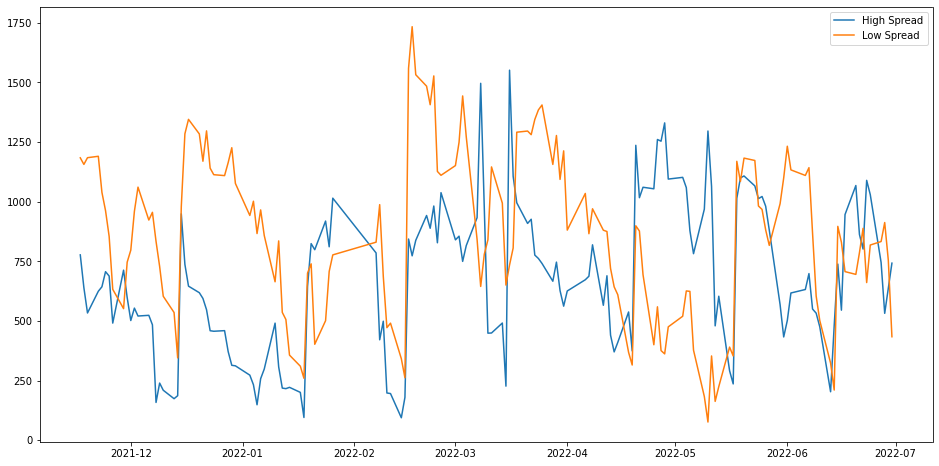

In [22]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
# for col in 'VWStrikeCall,High,Low,Close,VWStrikePut'.split(','):
ax.plot(plt_df.index, plt_df['VWStrikeCall'] - plt_df['High'], label="High Spread")
ax.plot(plt_df.index, plt_df['Low'] - plt_df['VWStrikePut'], label="Low Spread")
# com['VWStrikeCall,High,Low,Close,VWStrikePut'.split(',')].plot(ax=ax)
# for col in 'MaxOIStrikeCall,MaxOIStrikePut'.split(','):
#     ax.plot(plt_df.index, plt_df[col].astype(float), linestyle='--', label=col)
# com['MaxOIStrikeCall,MaxOIStrikePut'.split(',')].astype(float).plot(linestyle='--',legend=True, ax=ax) # secondary_y=True, 
# for x in expire_dates:
#     ax.vlines(x,
#               plt_df['VWStrikePut,Low,MaxOIStrikePut'.split(',')].min(axis=1).min(),
#               plt_df['VWStrikeCall,High,MaxOIStrikeCall'.split(',')].max(axis=1).max(),
#               color='yellow',
# #               label='Expire Date'
#                )
ax.legend()

In [30]:
spread_df = pd.concat([plt_df['VWStrikeCall'] - plt_df['High'], plt_df['Low'] - plt_df['VWStrikePut']], axis=1)
spread_df = pd.concat([spread_df, idx_df.loc[spread_df.index]], axis=1)

In [31]:
spread_df.head(30)

,0,1,IndexName,Open,High,Low,Close,Prediction,Realized,Profitable
Date,,,,,,,,,,
2021-11-17,776.860184,1183.782931,發行量加權股價指數,17693.13,17764.04,17669.58,17764.04,NaN,NaN,NaN
2021-11-18,639.152548,1156.179211,發行量加權股價指數,17764.04,17841.37,17748.21,17841.37,NaN,NaN,NaN
2021-11-19,533.338852,1184.343265,發行量加權股價指數,17841.37,17986.18,17786.05,17818.31,C < O,C < O,Earned
2021-11-22,624.345650,1190.244596,發行量加權股價指數,17818.31,17857.73,17790.64,17803.54,C > O,C < O,NaN
2021-11-23,643.154502,1038.937645,發行量加權股價指數,17803.54,17803.54,17650.07,17666.12,C > O,C < O,NaN
2021-11-24,706.447988,962.409853,發行量加權股價指數,17666.12,17722.89,17588.78,17642.52,C > O,C < O,Earned
2021-11-25,688.139993,854.449757,發行量加權股價指數,17642.52,17724.50,17609.51,17654.19,C < O,C > O,NaN
2021-11-26,490.886925,632.550927,發行量加權股價指數,17654.19,17654.19,17330.44,17369.39,C > O,C < O,NaN
2021-11-29,712.831559,551.546486,發行量加權股價指數,17369.39,17415.63,17167.24,17328.09,NaN,NaN,NaN


In [115]:
com.head(30)

,IndexName,Open,High,Low,Close,Prediction,Realized,Profitable,TTM,MaxOIStrikeCall,...,TotalOIPut,VWStrikePut,IsTTM,OICallDiff,OIPutDiff,OI_Ratio,OI_Ratio_diff,Match,MoneylessCall,MoneylessPut
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,發行量加權股價指數,14732.53,14937.13,14720.25,14902.03,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,發行量加權股價指數,14902.03,15000.03,14861.99,15000.03,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-06,發行量加權股價指數,15000.03,15197.68,14837.00,14983.13,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07,發行量加權股價指數,14983.13,15270.40,14983.13,15214.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-08,發行量加權股價指數,15214.00,15463.95,15214.00,15463.95,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-11,發行量加權股價指數,15463.95,15557.30,15395.73,15557.30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-12,發行量加權股價指數,15557.30,15642.03,15421.23,15500.70,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-13,發行量加權股價指數,15500.70,15778.52,15500.70,15769.98,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-14,發行量加權股價指數,15769.98,15769.98,15620.96,15707.19,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [385]:
datetime(2022,4,20) - datetime(2022,1,12)

datetime.timedelta(days=98)

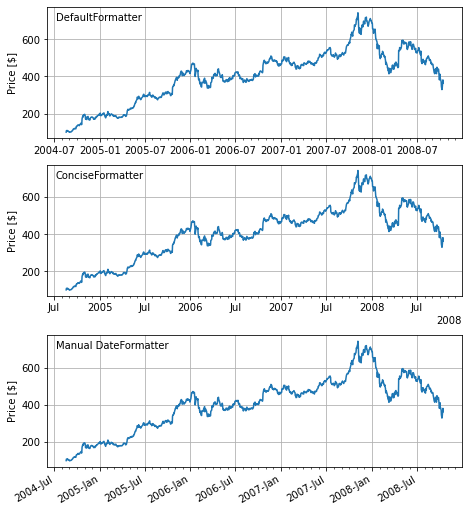

In [46]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

# Load a numpy structured array from yahoo csv data with fields date, open,
# close, volume, adj_close from the mpl-data/example directory.  This array
# stores the date as an np.datetime64 with a day unit ('D') in the 'date'
# column.
data = cbook.get_sample_data('goog.npz', np_load=True)['price_data']

fig, axs = plt.subplots(3, 1, figsize=(6.4, 7), constrained_layout=True)
# common to all three:
for ax in axs:
    ax.plot('date', 'adj_close', data=data)
    # Major ticks every half year, minor ticks every month,
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(True)
    ax.set_ylabel(r'Price [\$]')

# different formats:
ax = axs[0]
ax.set_title('DefaultFormatter', loc='left', y=0.85, x=0.02, fontsize='medium')

ax = axs[1]
ax.set_title('ConciseFormatter', loc='left', y=0.85, x=0.02, fontsize='medium')
ax.xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

ax = axs[2]
ax.set_title('Manual DateFormatter', loc='left', y=0.85, x=0.02,
             fontsize='medium')
# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.show()